---
# General 2-cell map
---

The invariant of motion for a McMillan 2=cell map is in the form

$$\begin{bmatrix}
 q^2\\q\\1	
 \end{bmatrix}^{\top}
\begin{bmatrix}
	\mathcal{X} &  \Lambda & \Gamma\\
		\Lambda_\circ & \Omega & \delta\\
			\Gamma_\circ & \delta_\circ & -\mathcal{K}
\end{bmatrix} 
\begin{bmatrix}
 p^2\\p\\1	
 \end{bmatrix} = 0$$

or:

$$\mathcal K = (\mathcal{X} q^2p^2) + (\Lambda q^2 p + \Lambda_\circ q p^2) + (\Gamma  q^2 + \Omega q p + \Gamma_\circ p^2) + (\delta q + \delta_\circ p)$$




And when it comes from the composition of two 1-cell maps with force function $f_1(p)$ and $f_2(p)$, we can show that:
$$f_1(p) =  -\frac{\Lambda_\circ p^2 + \Omega  p + \delta}{\mathcal{X} p^2 + \Lambda p + \Gamma} \qquad \text{and}\qquad f_2(p) =  -\frac{\Lambda p^2 + \Omega  p + \delta_\circ}{\mathcal{X} p^2 + \Lambda_\circ p + \Gamma_\circ}$$


---
# Symmetric map: sextupole terms only
---



Let's take a map with the following (symmetric) force functions:

$$f_1(p) = f_2(p) = -\frac{\Lambda p^2 + \Omega p }{\Lambda p + \Gamma}$$

which is supposed to have an invariant of the form:
$$\begin{bmatrix}
 q^2\\q\\1	
 \end{bmatrix}^{\top}
\begin{bmatrix}
	0 &  \Lambda & \Gamma\\
		\Lambda & \Omega & 0  \\
			\Gamma & 0 & -\mathcal{K}
\end{bmatrix} 
\begin{bmatrix}
 p^2\\p\\1	
 \end{bmatrix} = 0\qquad \text{or}\qquad 
\mathcal K = (\Lambda q^2 p + \Lambda q p^2) + (\Gamma  q^2 + \Omega q p + \Gamma p^2) 
$$

Map


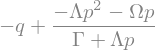

/Users/pbelanger/ABPLocal/McMillan/Machines/2cellmcmillan/../../McMillan/Maps/Maps.py:39: UserWarning: Map is not a polynomial
  warnings.warn('Map is not a polynomial')


Poly Map


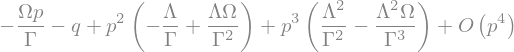

------------------------------------------------------------
Poly Map, perturbation theory:
------------------------------------------------------------


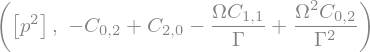

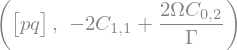

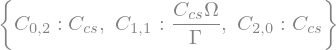

------------------------------------------------------------
------------------------------------------------------------


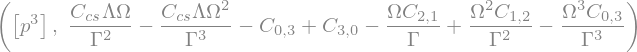

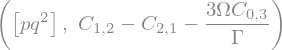

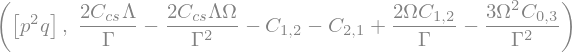

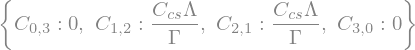

------------------------------------------------------------
------------------------------------------------------------
Invariant, to first order


------------------------------------------------------------


In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(use_unicode=True,fontsize=24)
import sys

sys.path.append('../../')
import McMillan.Maps.Maps as maps
import McMillan.Plotting.McMPlots as mcmplt

q, p, Lambda, Omega, Gamma, K  = sp.symbols('q p Lambda Omega Gamma K ',real=True,positive=True)

#=========================
# MAP

f_p = - (Lambda*p**2 + Omega*p)/(Lambda*p + Gamma)

q_map  =  p
p_map  = -q + f_p 

#=========================

print('Map')
display(q_map,p_map)

sext = maps.Map1D(q_map,p_map,q,p)

print('Poly Map')
display(q_map,-q + f_p.series(p,x0=0,n=4))

sext_poly = maps.Map1D(q_map,-q + (f_p.series(p,x0=0,n=4)).removeO(),q,p)

print(60*'-')
print('Poly Map, perturbation theory:')
sext_poly.solve_C(0,verbose=True)
sext_poly.solve_C(1,verbose=True)
print(60*'-')
print('Invariant, to first order')
display(sext_poly.Kofn(1).subs({sext_poly.eps:1,sext_poly.C_cs:Gamma},simultaneous=True))
print(60*'-')


## Numerical example


<lambdifygenerated-94>:2: RuntimeWarning: overflow encountered in scalar power
  return 9450000.0*p**3 + 3150.0*p**2 + 0.05*p - q
<lambdifygenerated-94>:2: RuntimeWarning: invalid value encountered in scalar subtract
  return 9450000.0*p**3 + 3150.0*p**2 + 0.05*p - q


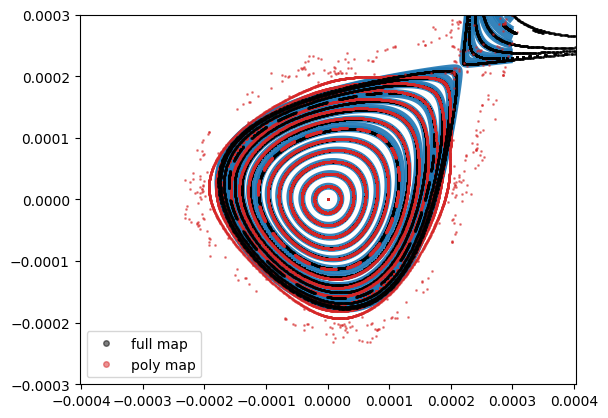

In [14]:
sext.update({       Lambda : -3000,
                    Omega  : -0.05,
                    Gamma  : 1},deep_update = True)

sext_poly.update({  Lambda : -3000,
                    Omega  : -0.05,
                    Gamma  : 1},deep_update = True)
sext_poly.update({  sext_poly.C_cs : 1},deep_update = True)



#=================================
# PLOTTING
plt.figure()
x_points = np.linspace(0,3e-4,20)
px_points = np.linspace(0,3e-4,20)

mcmplt.plot_invariant(sext_poly.Kofn(1).subs({sext_poly.eps:1}),sext_poly.q,sext_poly.p,eval_at=[x_points,px_points],colors='C0',alpha=0.9,linewidths=5)
for part_x,part_px in zip(x_points,px_points):
    _x,_px =  sext.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='k',alpha=0.5,ms=1)

    _x,_px =  sext_poly.iterate(part_x,part_px,2000)
    plt.plot(_x,_px,'o',color='C3',alpha=0.5,ms=1)


plt.plot([],[],'o',color='k',alpha=0.5,ms=4,label='full map')
plt.plot([],[],'o',color='C3',alpha=0.5,ms=4,label='poly map')
plt.axis('equal')
plt.legend()
plt.xlim([-3e-4,3e-4])
plt.ylim([-3e-4,3e-4])